# DMV 1 LAB

In [1]:
#Importing important libraries
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv("sales_data_sample 1.csv", encoding='latin1')

In [3]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [38]:
df.shape

(2823, 25)

In [39]:
df.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \


In [40]:
#Checks for NA values in columns
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [41]:
df.describe

<bound method NDFrame.describe of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  

In [4]:
#Dropping unnecessary columns
df = df.drop(['ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','TERRITORY'],axis = 1)

In [43]:
df.isna().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
POSTALCODE          76
COUNTRY              0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

In [44]:
# Check if the 'POSTALCODE' column has any non-null values
if not df['POSTALCODE'].isnull().all():
    # Filling all NA values with mode of the POSTALCODE column
    df['POSTALCODE'] = df['POSTALCODE'].fillna(df['POSTALCODE'].mode().iloc[0])
else:
    print("All values in 'POSTALCODE' column are null.")

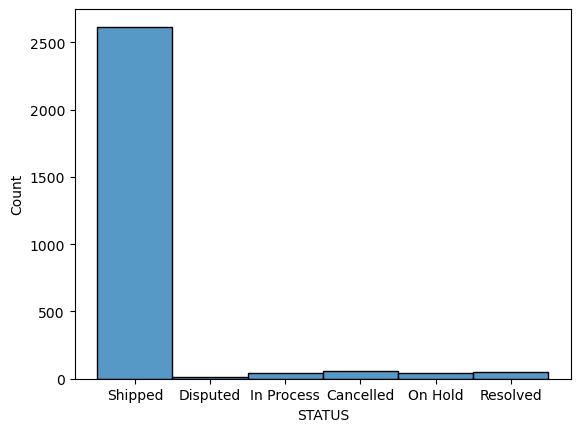

In [5]:
#Plotting histogram plot for STATUS column

import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='STATUS', data=df, )
plt.show()

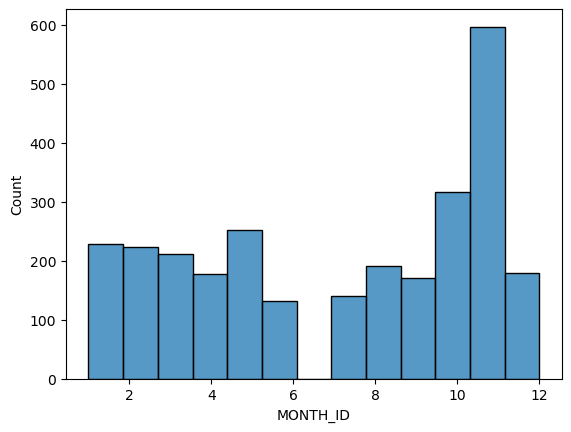

In [6]:
#Plotting histogram plot for MONTH_ID column
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='MONTH_ID', data=df, )
plt.show()

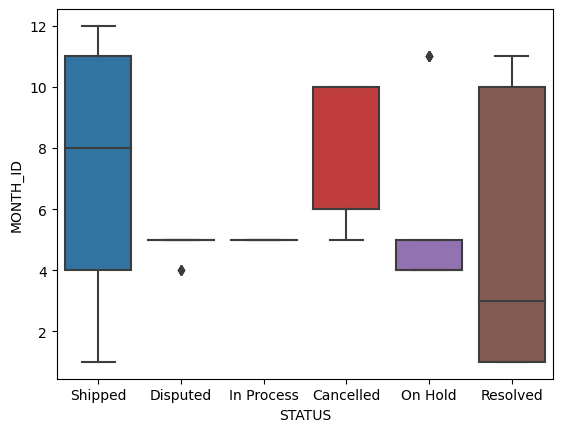

In [7]:
#Plotting boxplot for STATUS column against MONTH_ID column
sns.boxplot( x="STATUS", y= "MONTH_ID", data=df, )
plt.show()

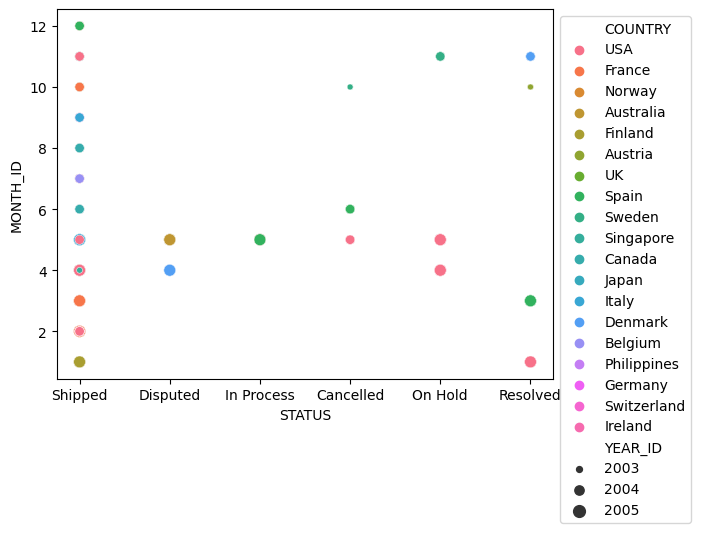

In [8]:
#Plotting Scatterplot
sns.scatterplot( x="STATUS", y="MONTH_ID", data=df,
                hue='COUNTRY', size='YEAR_ID')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

In [49]:
#Checking the data only for shipped STATUS
data1=df[df["STATUS"]=='Shipped']
data1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,28034,USA,Brown,Julie,Medium


In [50]:
data1.shape

(2617, 20)

In [51]:
#Calculating sum for sales column
sum_sales = df['SALES'].sum()
print("Addition of all sales",sum_sales)

Addition of all sales 10032628.85


In [52]:
#Calulating average for sales column
sales_avg = df['SALES'].mean()
print("Average of total sales = ",sales_avg)

Average of total sales =  3553.889071909316


Old Shape:  (2823, 20)
New Shape:  (2742, 20)


C:\Users\prani\AppData\Local\Temp\ipykernel_7088\2980988528.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SALES'], 25,
C:\Users\prani\AppData\Local\Temp\ipykernel_7088\2980988528.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['SALES'], 75,


<Axes: xlabel='SALES'>

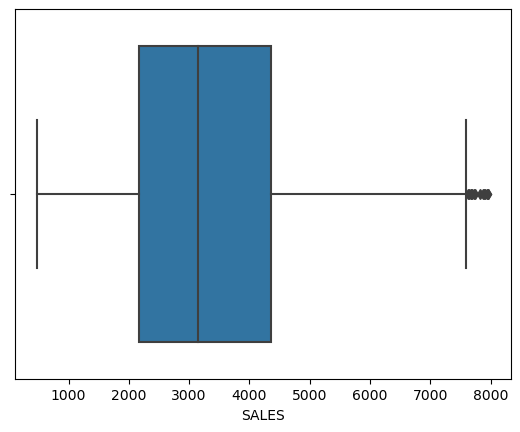

In [53]:
import sklearn
import pandas as pd
import seaborn as sns

# IQR
Q1 = np.percentile(df['SALES'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['SALES'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['SALES'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['SALES'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='SALES', data=df)

# DMV 2 LAB

In [9]:
import requests
import pandas as pd
import datetime

In [10]:
# Set your OpenWeatherMap API key
api_key = '31d59a457a5fd5f690afe015d70c617d'

In [11]:
# Set the location for which you want to retrieve weather data
lat = 19.751480
lon = 75.713890

In [12]:
#https://openweathermap.org/api/one-call-3#how       How to use api call
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [13]:
# Send a GET request to the API
response = requests.get(api_url)
weather_data = response.json()       #pass response to weather_data object(dictionary)

In [14]:
weather_data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [15]:
weather_data['list'][0]

{'dt': 1700427600,
 'main': {'temp': 294.81,
  'feels_like': 294.62,
  'temp_min': 293.54,
  'temp_max': 294.81,
  'pressure': 1015,
  'sea_level': 1015,
  'grnd_level': 957,
  'humidity': 61,
  'temp_kf': 1.27},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'clouds': {'all': 0},
 'wind': {'speed': 2.63, 'deg': 97, 'gust': 2.85},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'n'},
 'dt_txt': '2023-11-19 21:00:00'}

In [16]:
len(weather_data['list'])

40

In [17]:
weather_data['list'][0]['weather'][0]['description']

'clear sky'

In [18]:
#getting the data from dictionary and taking into one variable
# Extract relevant weather attributes using list comprehension
temperatures = [item['main']['temp'] for item in weather_data['list']]      #it will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperatures,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'weather_description': weather_description,
})

# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)

In [19]:
max_temp = weather_df['Temperature'].max()
max_temp

303.84

In [20]:
min_temp = weather_df['Temperature'].min()
min_temp

291.49

In [21]:
# Clean and preprocess the data

# Handling missing values
weather_df.fillna(0, inplace=True)  # Replace missing values with 0 or appropriate value

# Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float) else x)   # Convert temperature from Kelvin to Celsius

# Print the cleaned and preprocessed data
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2023-11-19 21:00:00        21.66        61        2.63           clear sky
2023-11-20 00:00:00        20.36        66        1.91           clear sky
2023-11-20 03:00:00        23.72        55        3.04           clear sky
2023-11-20 06:00:00        28.82        38        3.31           clear sky
2023-11-20 09:00:00        30.53        33        2.13           clear sky
2023-11-20 12:00:00        27.49        40        2.85           clear sky
2023-11-20 15:00:00        23.54        46        3.61           clear sky
2023-11-20 18:00:00        21.80        50        2.54           clear sky
2023-11-20 21:00:00        20.32        53        2.28    scattered clouds
2023-11-21 00:00:00        19.27        57        1.86       broken clouds
2023-11-21 03:00:00        23.63        47        2.09          few clouds
2023-11-21 06:00:00      

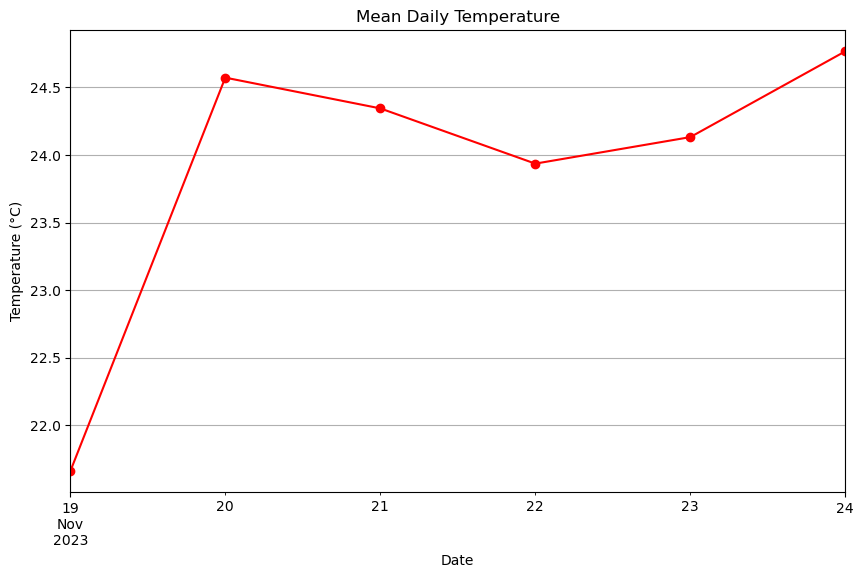

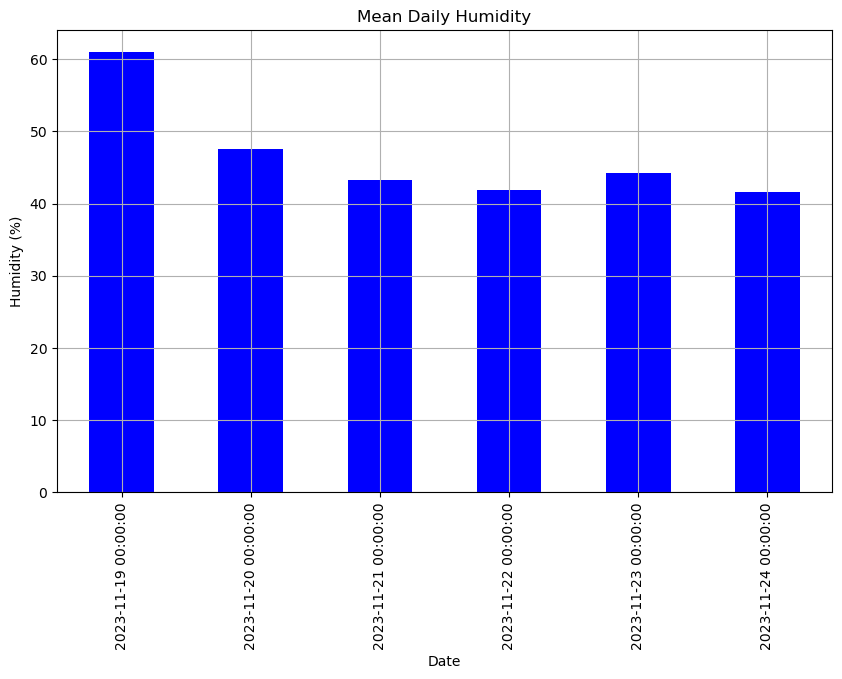

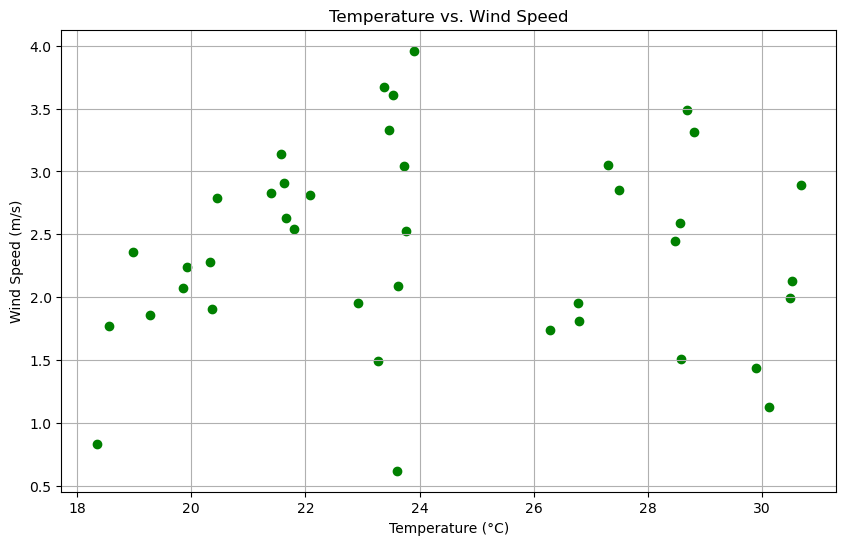

In [22]:
import matplotlib.pyplot as plt

daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

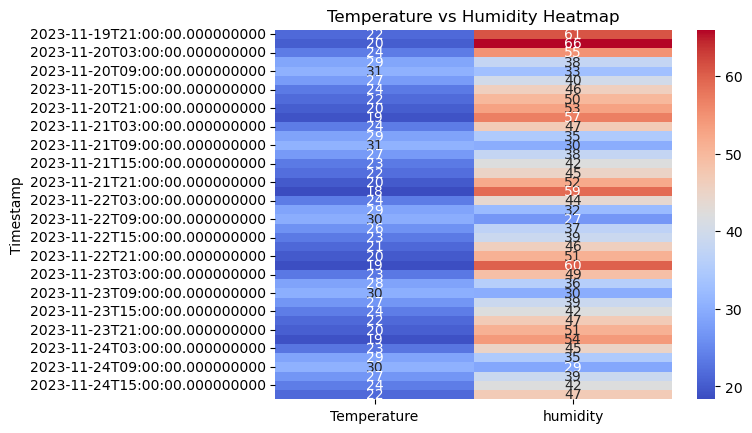

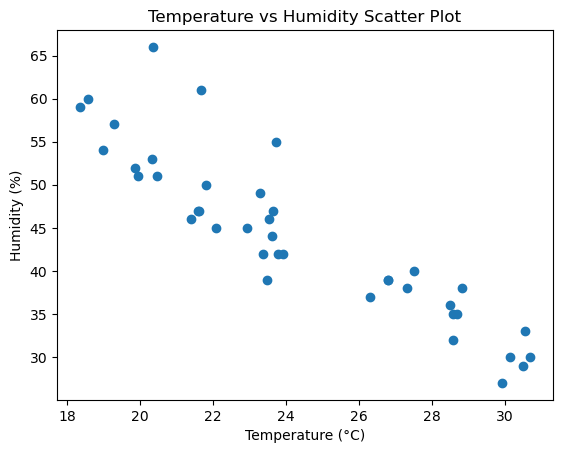

In [23]:
import seaborn as sns

heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [72]:
!pip install geopandas
!pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.3 kB ? eta -:--:--
   --------------- ----------------------- 41.0/100.3 kB 495.5 kB/s eta 0:00:01
   -------------------------------------- 100.3/100.3 kB 958.1 kB/s eta 0:00:00


In [73]:
import requests
import pandas as pd
import geopandas as gpd
import folium

# Set your OpenWeatherMap API key
api_key = '31d59a457a5fd5f690afe015d70c617d'

# Specify the locations for which you want to retrieve weather data
locations = ['Maharashtra']

# Initialize an empty list to store DataFrames for each location
dfs = []

# Retrieve weather data for each location
for location in locations:
    # Construct the API URL
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'

    # Send a GET request to the API
    response = requests.get(api_url)
    weather_data = response.json()

    # Extract relevant weather attributes
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    wind_speed = weather_data['wind']['speed']
    latitude = weather_data['coord']['lat']
    longitude = weather_data['coord']['lon']

    # Create a DataFrame for the location's weather data
    location_df = pd.DataFrame({
        'Location': [location],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Wind Speed': [wind_speed],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })
    
    dfs.append(location_df)

# Concatenate all DataFrames in the list into a single DataFrame
all_locations_df = pd.concat(dfs, ignore_index=True)

# Display the combined weather data for all locations
print(all_locations_df)

      Location  Temperature  Humidity  Wind Speed  Latitude  Longitude
0  Maharashtra       299.53        45         3.5      19.5         75


In [74]:
all_locations_df

,Location,Temperature,Humidity,Wind Speed,Latitude,Longitude
0,Maharashtra,299.53,45,3.5,19.5,75


In [75]:
# Load a world map shapefile using geopandas
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Rename the column used for merging in the world map DataFrame
world_map.rename(columns={'name': 'Location'}, inplace=True)

# Merge the weather data with the world map based on location
weather_map = world_map.merge(location_df, on='Location')

# Create a folium map centered around the mean latitude and longitude of all locations
map_center = [location_df['Latitude'].mean(), location_df['Longitude'].mean()]
weather_map_folium = folium.Map(location=map_center, zoom_start=2)

# Add weather markers to the folium map
for index, row in weather_map.iterrows():
    location = [row['Latitude'], row['Longitude']]
    temperature = row['Temperature']
    marker_text = f'Temperature: {temperature} K'
    folium.Marker(location, popup=marker_text, icon=folium.Icon(icon='cloud', color='red')).add_to(weather_map_folium)

# display the folium map
weather_map_folium

C:\Users\prani\AppData\Local\Temp\ipykernel_7088\4238234477.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [76]:
type(weather_map_folium)

folium.folium.Map

# DMV 3 LAB

In [42]:
import pandas as pd                 #data manipulation
import numpy as np                  #numerical computations
from sklearn.model_selection import train_test_split              # scikit-learn for machine learning models  split the dataset into training and testing sets for model evaluation
from sklearn import metrics                          #evaluating the performance of machine learning models

In [43]:
df = pd.read_csv("Telco_Customer_Churn 3.csv")

In [44]:
df.index

RangeIndex(start=0, stop=7043, step=1)

In [80]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [81]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [82]:
df.shape

(7043, 21)

In [83]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [85]:
# to know unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [86]:
# data.isna().sum() is used to count the number of missing values (NaN values) in each column of a pandas DataFrame called data.
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [87]:
# isna() and isnull() are essentially the same method in Pandas, and they both return a boolean mask of the same shape as the input object, indicating where missing values (NaN or None) are present.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
# Check the number of rows before removing duplicates
print("Number of rows before removing duplicates:", len(df))

Number of rows before removing duplicates: 7043


In [89]:
# Remove duplicate records
df_cleaned = df.drop_duplicates()

In [90]:
# Check the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df_cleaned))

Number of rows after removing duplicates: 7043


In [91]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [92]:
#Measure of frequency destribution
unique, counts = np.unique(df['tenure'], return_counts=True)
print(unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72] [ 11 613 238 200 176 133 110 131 123 119 116  99 117 109  76  99  80  87
  97  73  71  63  90  85  94  79  79  72  57  72  72  65  69  64  65  88
  50  65  59  56  64  70  65  65  51  61  74  68  64  66  68  68  80  70
  68  64  80  65  67  60  76  76  70  72  80  76  89  98 100  95 119 170
 362]


In [93]:
#Measure of frequency destribution
unique, counts = np.unique(df['MonthlyCharges'], return_counts=True)
print(unique, counts)

[ 18.25  18.4   18.55 ... 118.6  118.65 118.75] [1 1 1 ... 2 1 1]


In [94]:
#Measure of frequency destribution
unique, counts = np.unique(df['TotalCharges'], return_counts=True)
print(unique, counts)

[' ' '100.2' '100.25' ... '999.45' '999.8' '999.9'] [11  1  1 ...  1  1  1]


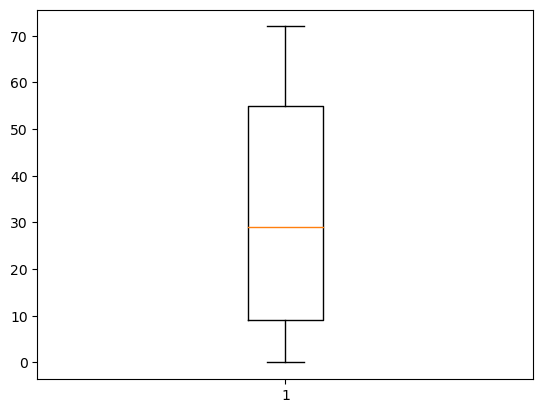

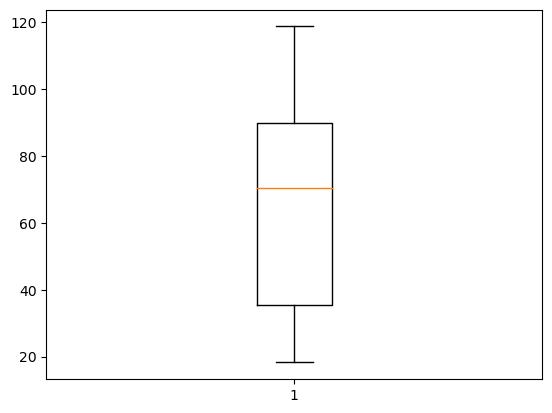

In [95]:
#checking boxplot for Fare column
import matplotlib.pyplot as plt              #pyplot module from the Matplotlib library
plt.boxplot(df['tenure'])
plt.show()
plt.boxplot(df['MonthlyCharges'])
plt.show()
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [96]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(1409, 20)

In [97]:
# Export the cleaned dataset to a CSV file
df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)

# DMV 4 LAB

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [46]:
df1 = pd.read_csv("Bengaluru_House_Data 4.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [49]:
df1.shape

(13320, 9)

In [50]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [51]:
df1['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [52]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [53]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [54]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [55]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [56]:
df2.shape

(13320, 5)

In [57]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [58]:
df3.shape

(13246, 5)

In [59]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [60]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Rahul\AppData\Local\Temp\ipykernel_22696\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [61]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [62]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [63]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [64]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [65]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [66]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [68]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [69]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [70]:
convert_sqft_to_num('34.46Sq. Meter')

In [71]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [72]:
df4 = df4[df4.total_sqft.notnull()]
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [73]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [74]:
(2100 + 2850)/2

2475.0

In [75]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [76]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [77]:
df5.to_csv("bhp.csv",index=False)

In [78]:
len(df5.location.unique())

1298

In [79]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [80]:
len(location_stats[location_stats>10])

240

In [81]:
len(location_stats)

1287

In [82]:
len(location_stats[location_stats<=10])

1047

In [83]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [84]:
len(df5.location.unique())

1287

In [85]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [86]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [87]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [88]:
df5.shape

(13200, 7)

In [89]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [90]:
df6.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

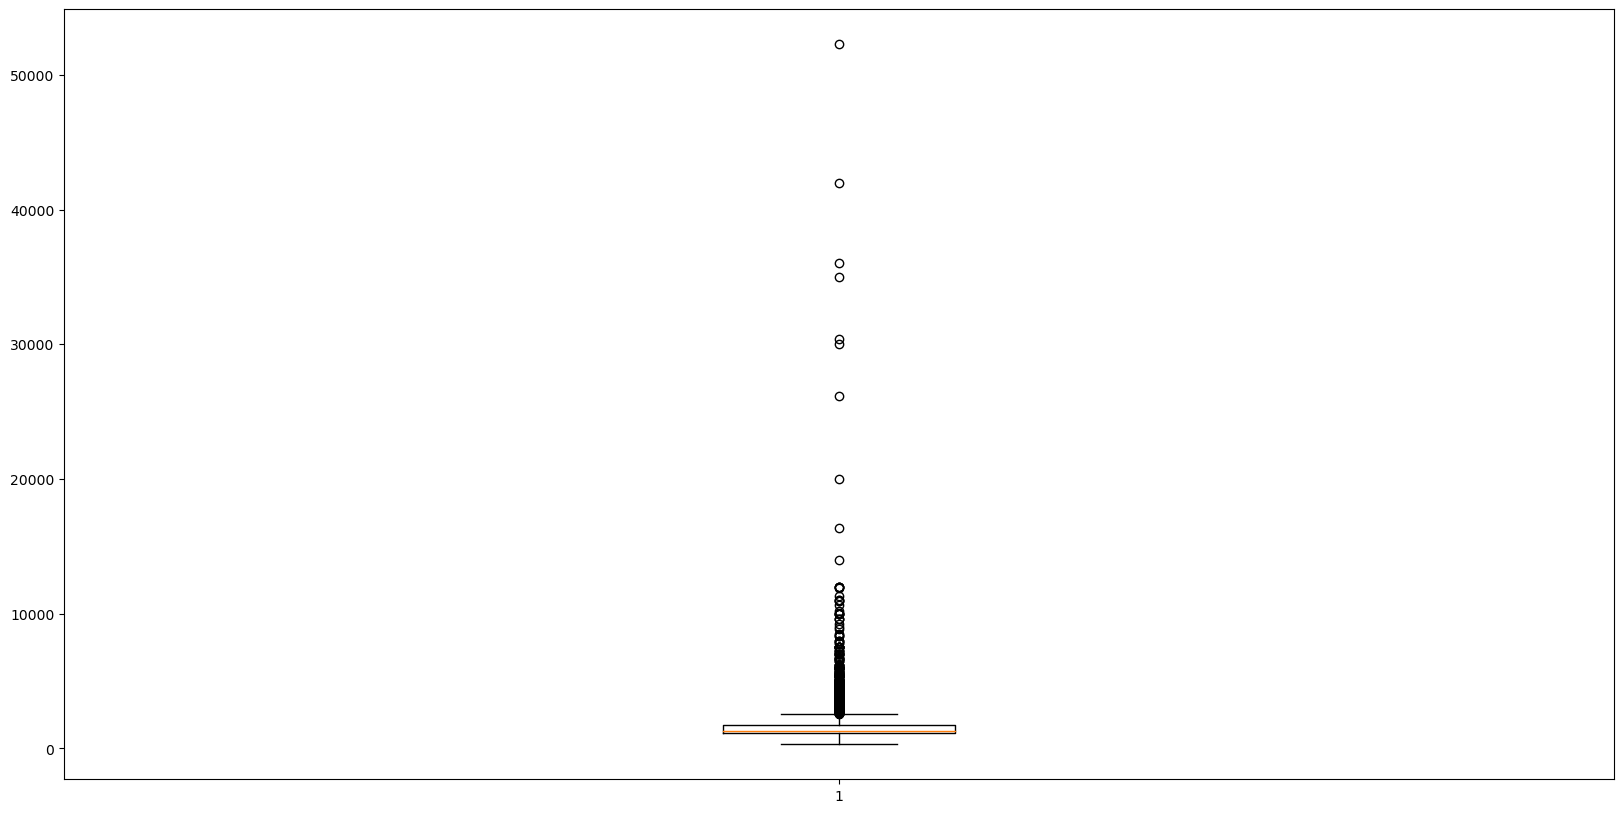

In [91]:
plt.boxplot(df6['total_sqft'])
plt.show()

In [92]:
Q1 = np.percentile(df6['total_sqft'], 25.) # 25th percentile of the data of the given feature
Q3 = np.percentile(df6['total_sqft'], 75.) # 75th percentile of the data of the given feature
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['total_sqft'] > ul].index.tolist()
lower_outliers = df6[df6['total_sqft'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

C:\Users\Rahul\AppData\Local\Temp\ipykernel_22696\2410959208.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


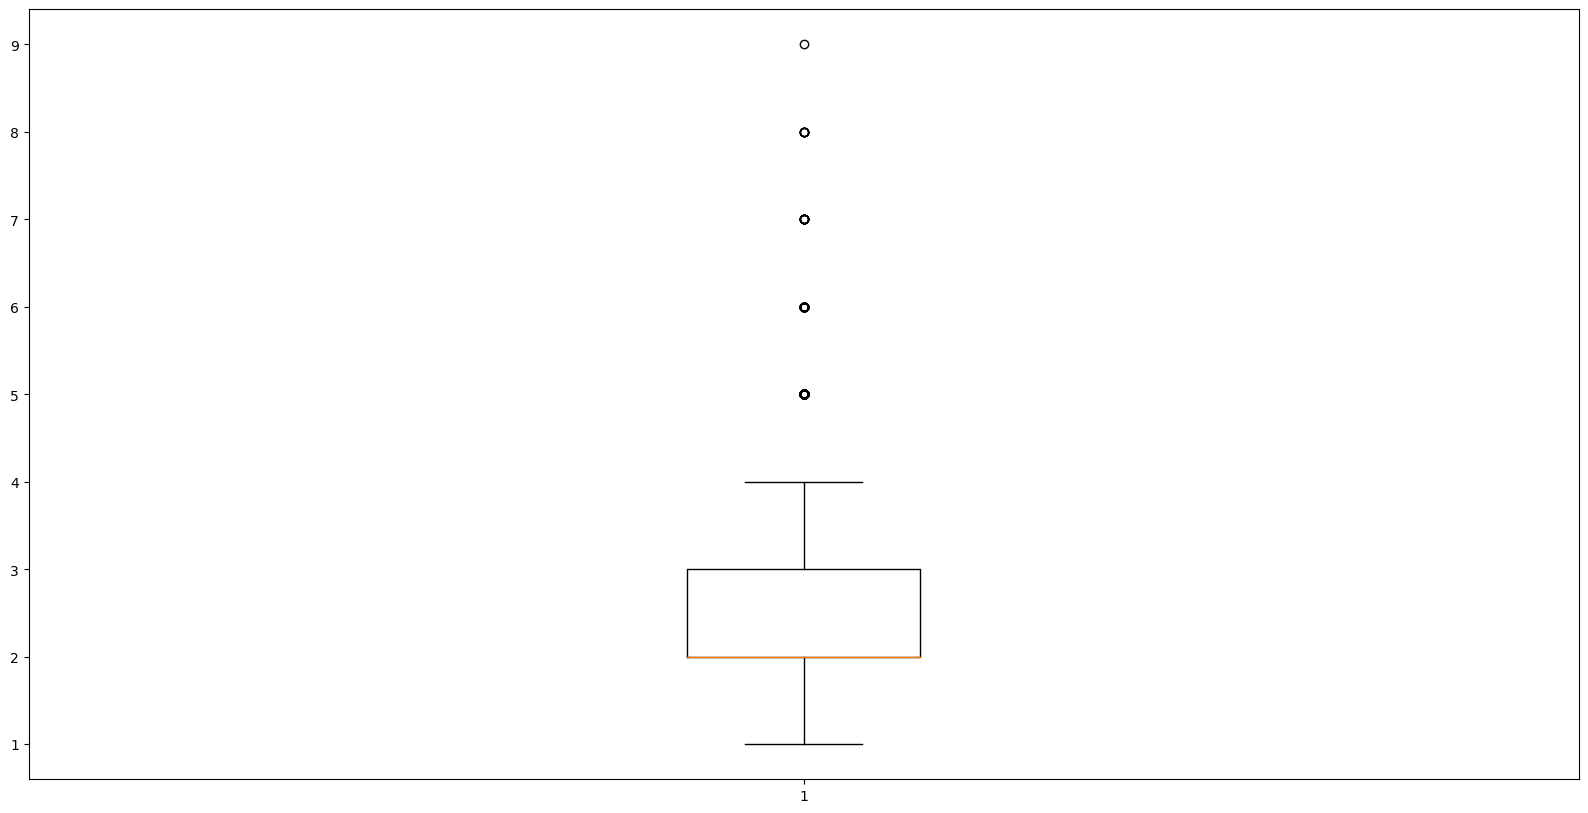

In [93]:
plt.boxplot(df6['bath'])
plt.show()

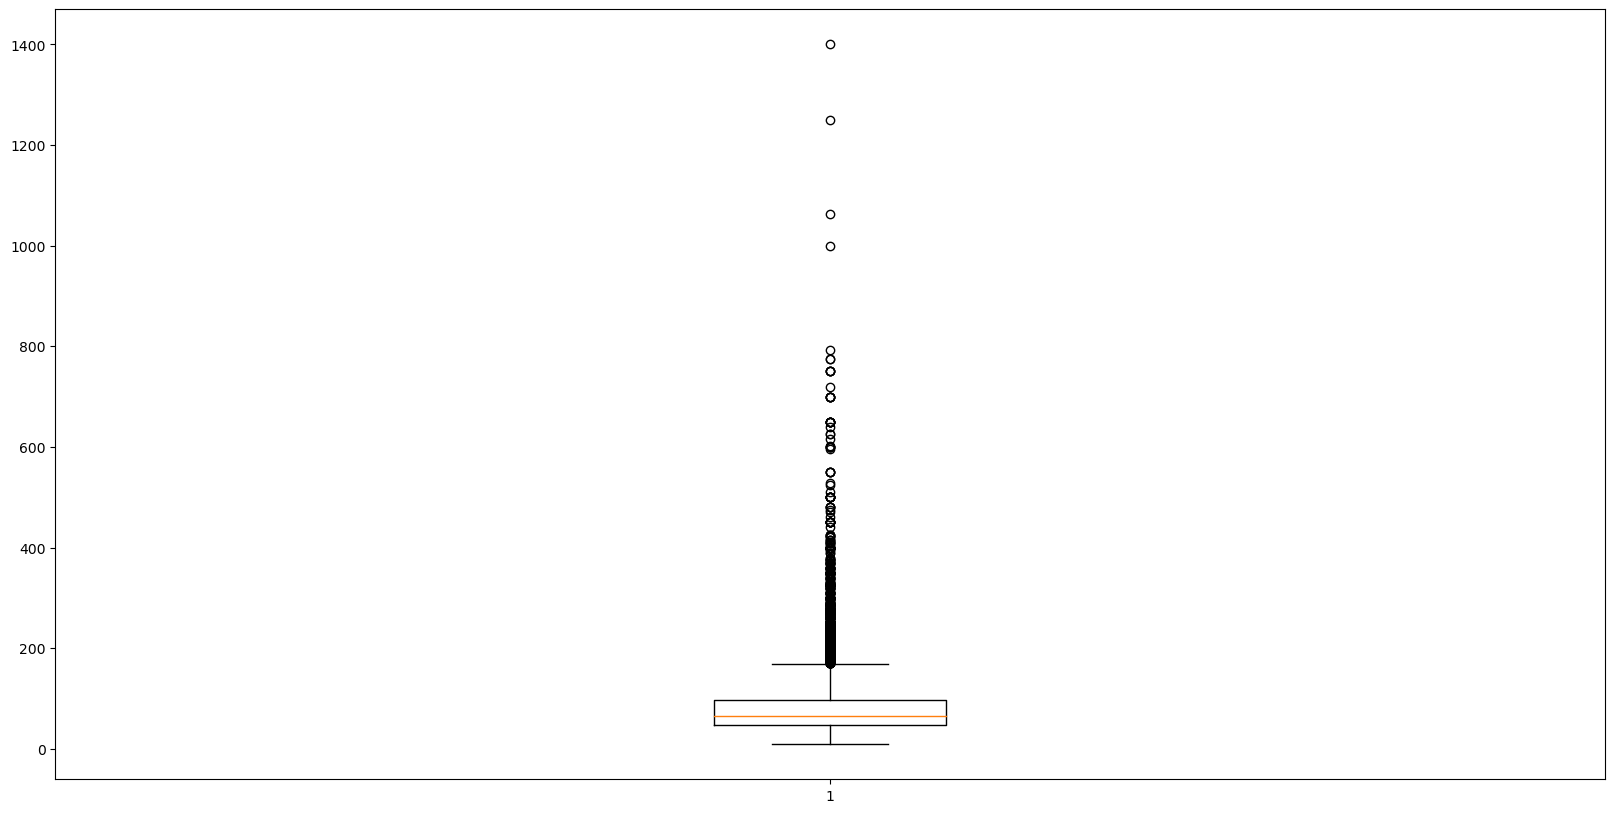

In [94]:
plt.boxplot(df6['price'])
plt.show()

In [95]:
Q1 = np.percentile(df6['price'], 25.) # 25th percentile of the data of the given feature
Q3 = np.percentile(df6['price'], 75.) # 75th percentile of the data of the given feature
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['price'] > ul].index.tolist()
lower_outliers = df6[df6['price'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

C:\Users\Rahul\AppData\Local\Temp\ipykernel_22696\1496384405.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


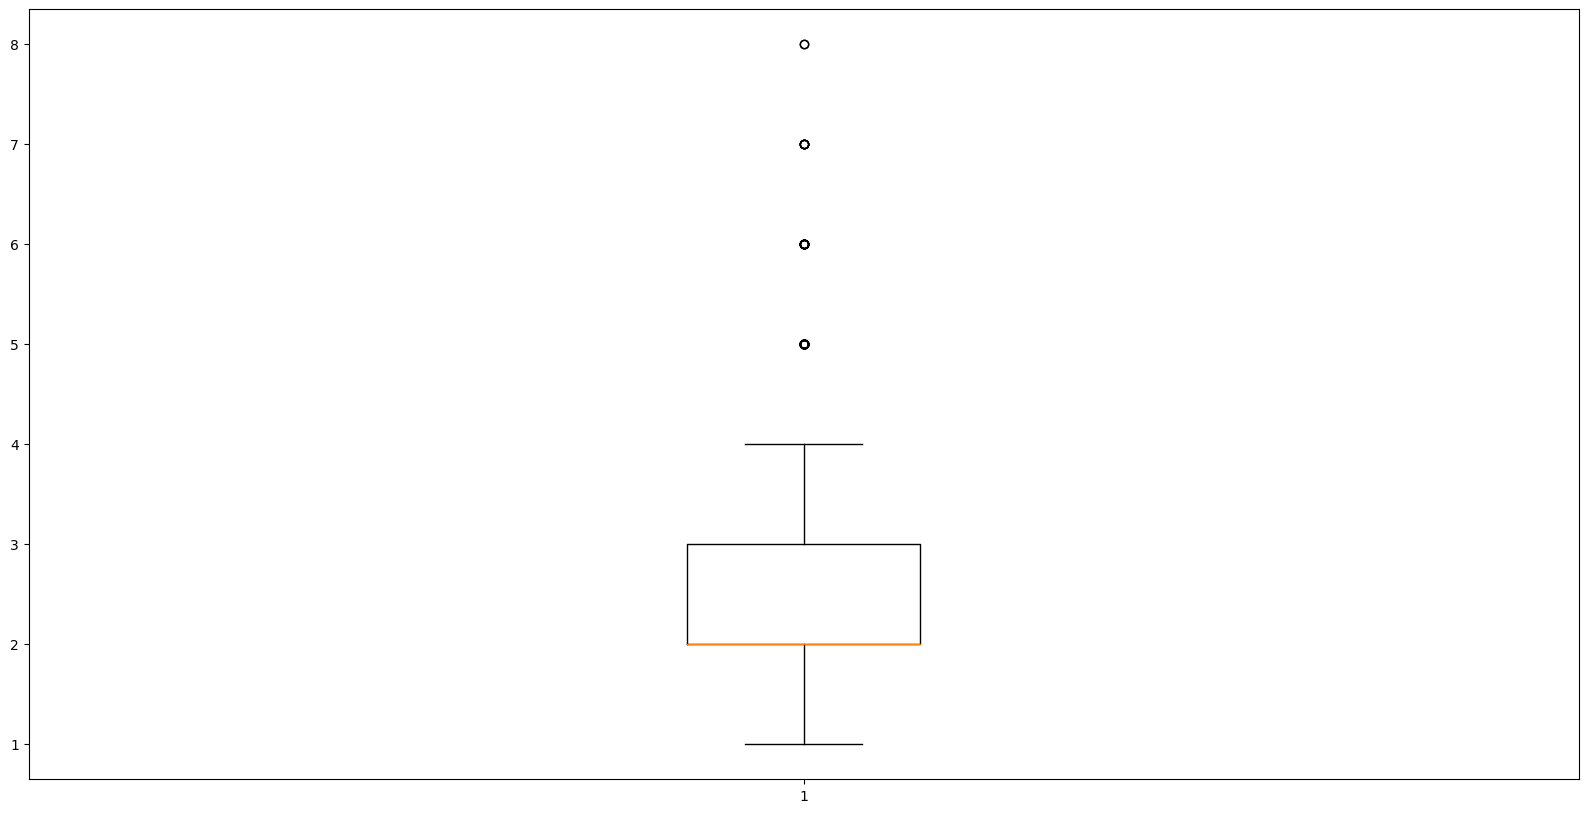

In [96]:
plt.boxplot(df6['bhk'])
plt.show()

In [149]:
Q1 = np.percentile(df6['bhk'], 25.) # 25th percentile of the data of the given feature
Q3 = np.percentile(df6['bhk'], 75.) # 75th percentile of the data of the given feature
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['bhk'] > ul].index.tolist()
lower_outliers = df6[df6['bhk'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

C:\Users\prani\AppData\Local\Temp\ipykernel_7088\582037494.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


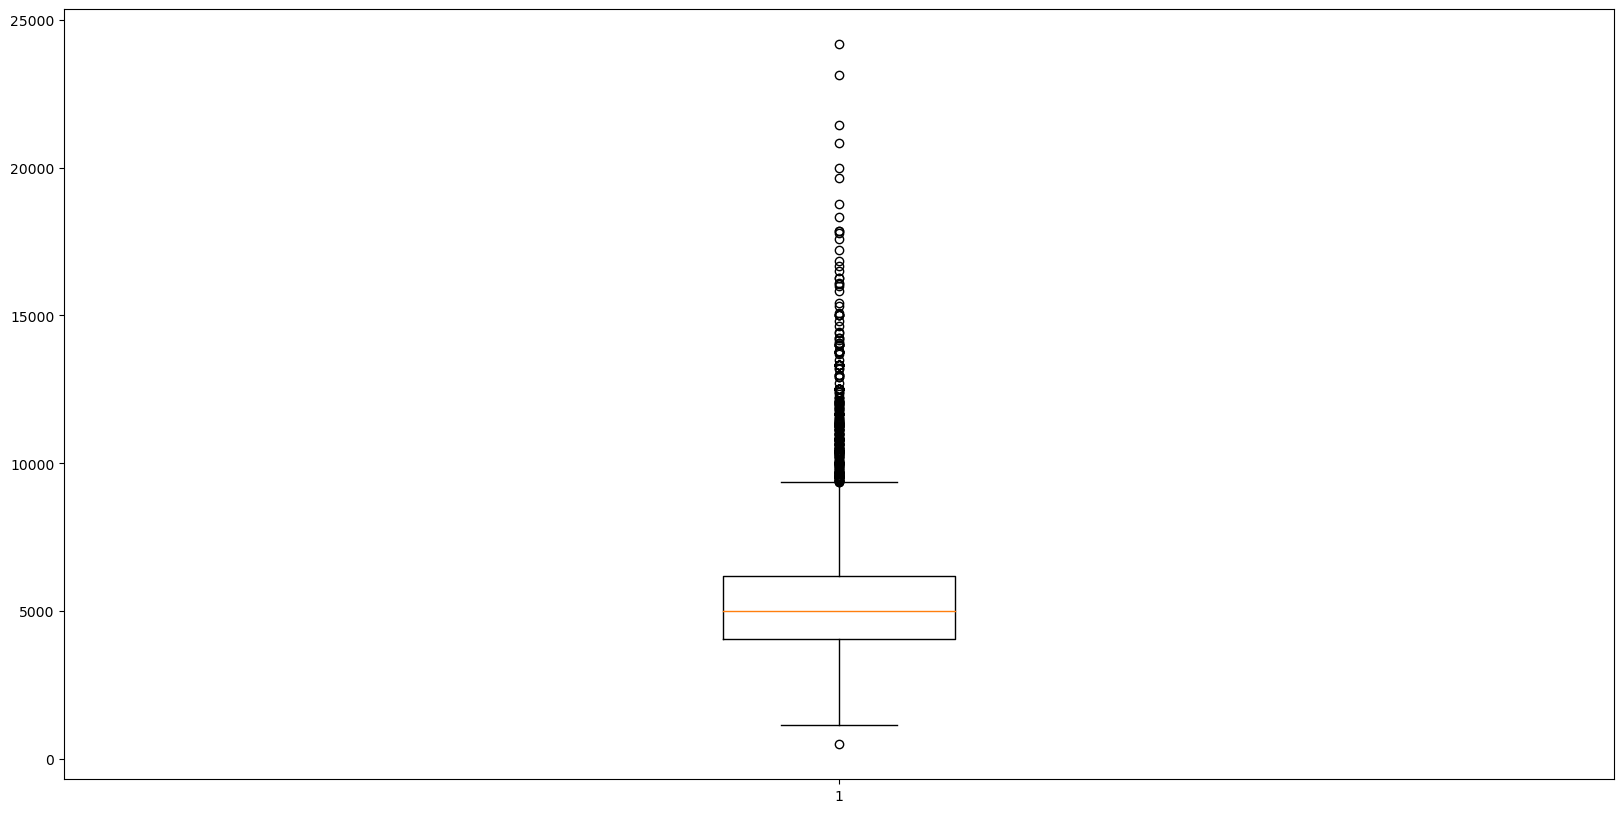

In [150]:
plt.boxplot(df6['price_per_sqft'])
plt.show()

In [151]:
Q1 = np.percentile(df6['price_per_sqft'], 25.) # 25th percentile of the data of the given feature
Q3 = np.percentile(df6['price_per_sqft'], 75.) # 75th percentile of the data of the given feature
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['price_per_sqft'] > ul].index.tolist()
lower_outliers = df6[df6['price_per_sqft'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

C:\Users\prani\AppData\Local\Temp\ipykernel_7088\1825011624.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(bad_indices, inplace = True, errors = 'ignore')


In [152]:
df6.shape

(10125, 7)

In [97]:
X = df6.drop(['price'],axis='columns')
X.head(3)

,location,size,total_sqft,bath,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,6245.890861


In [98]:
X.shape

(10514, 6)

In [99]:
y = df6.price
y.head(3)

0    39.07
2    62.00
3    95.00
Name: price, dtype: float64

In [100]:
len(y)

10514

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [103]:
X_train.shape

(8411, 6)

In [104]:
y_train.shape

(8411,)

In [105]:
X_test.shape

(2103, 6)

In [106]:
y_test.shape

(2103,)

# DMV 5 LAB

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:


# Step 1: Import the dataset
data = pd.read_csv("city_day 5.csv", encoding='latin1')

# Step 2: Explore the dataset
print(data.head())
print(data.info())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

In [4]:

# Step 3: Clean column names and ensure 'Date' column is in datetime format
print(data.columns)  # Add this line to check the column names
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Step 4: Identify relevant variables
date_col = "Date"




Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [31]:
# Assuming 'AQI' is the column representing the Air Quality Index
aqi_col = 'AQI'

# Step 5: Create overall AQI trend plot
plt.figure(figsize=(10, 6))
plt.plot(data[date_col], data[aqi_col], label="AQI", color="blue")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Trend Over Time")
plt.legend()
plt.show()


NameError: name 'date_col' is not defined

<Figure size 1000x600 with 0 Axes>

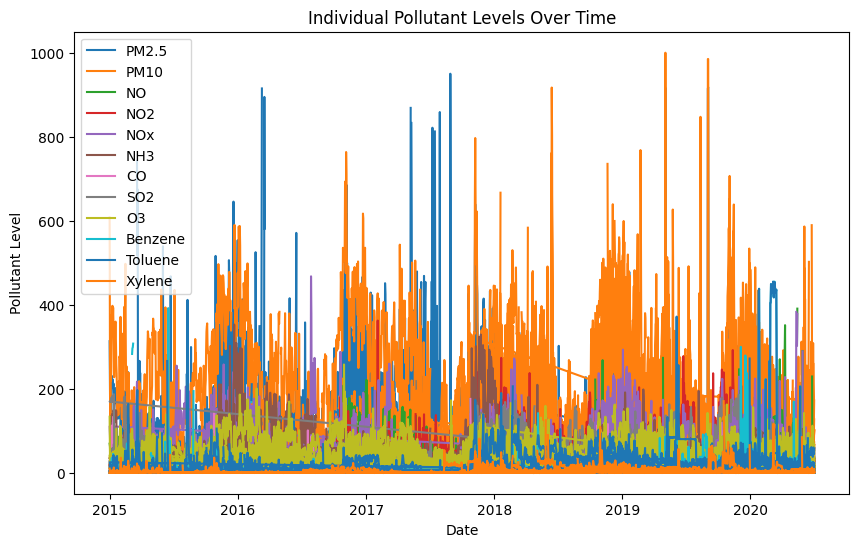

In [6]:

# Assuming these are the pollutants in your DataFrame
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Step 6: Create individual pollutant level plots
plt.figure(figsize=(10, 6))
for pollutant in pollutants:
    plt.plot(data[date_col], data[pollutant], label=pollutant)

plt.xlabel("Date")
plt.ylabel("Pollutant Level")
plt.title("Individual Pollutant Levels Over Time")
plt.legend()
plt.show()


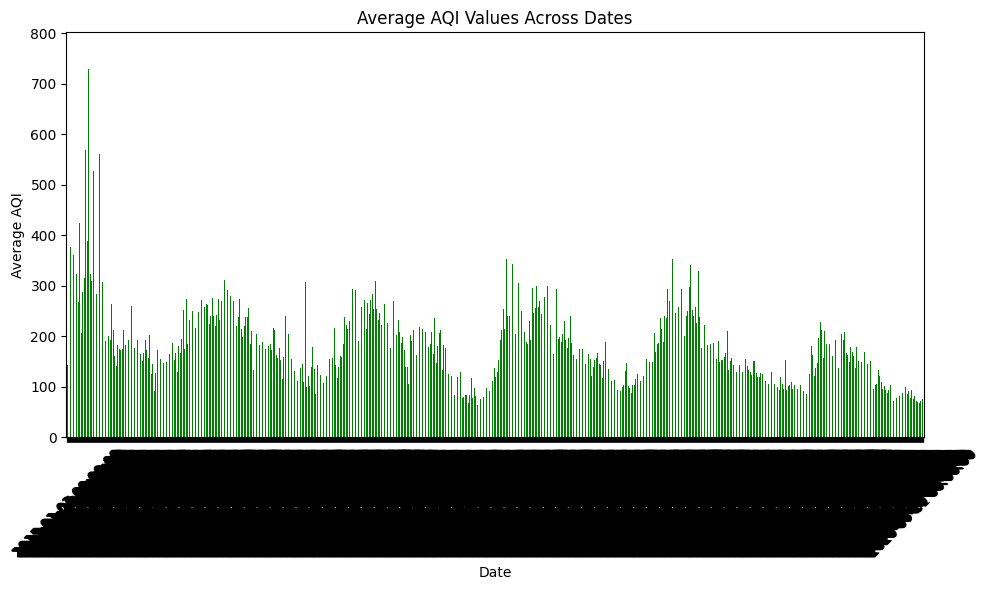

In [7]:
# Step 7: Create bar plots to compare AQI values across dates
plt.figure(figsize=(10, 6))
data_grouped = data.groupby(date_col)[aqi_col].mean()
data_grouped.plot(kind="bar", color="green")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.title("Average AQI Values Across Dates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



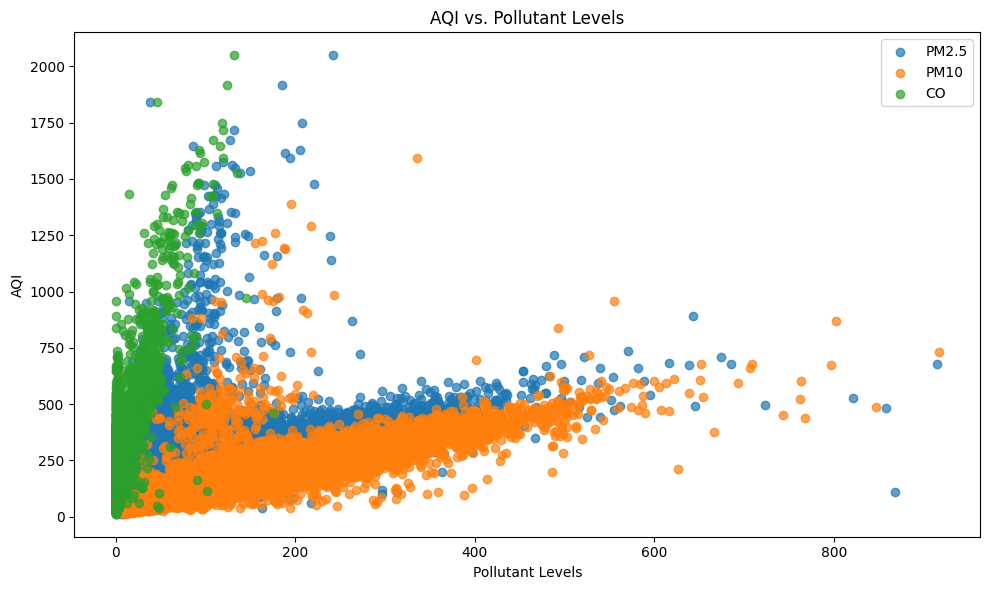

In [8]:
# Step 8: Create scatter plot to explore AQI vs. pollutant relationship
plt.figure(figsize=(10, 6))
plt.scatter(data["PM2.5"], data[aqi_col], alpha=0.7, label="PM2.5")
plt.scatter(data["PM10"], data[aqi_col], alpha=0.7, label="PM10")
plt.scatter(data["CO"], data[aqi_col], alpha=0.7, label="CO")
plt.xlabel("Pollutant Levels")
plt.ylabel("AQI")
plt.title("AQI vs. Pollutant Levels")
plt.legend()
plt.tight_layout()
plt.show()



C:\Users\prani\AppData\Local\Temp\ipykernel_6740\3567416273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data[date_col] = pd.to_datetime(city_data[date_col])
C:\Users\prani\AppData\Local\Temp\ipykernel_6740\3567416273.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Year'] = city_data[date_col].dt.year


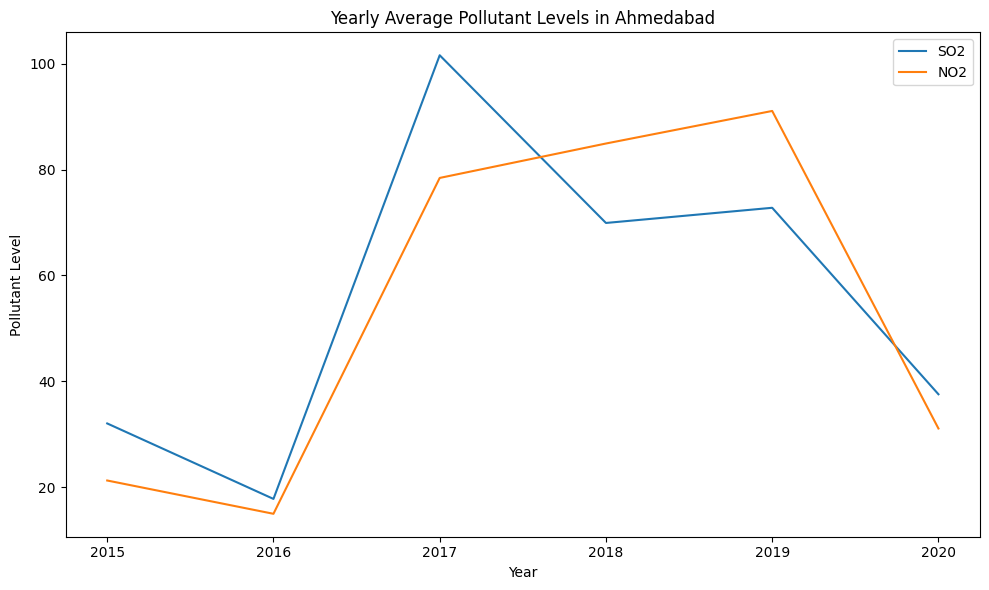

In [9]:
def plot_yearly_pollutant_levels(data, city_name):
    # Filter data for the given city
    city_data = data[data['City'] == city_name]

    # Extract relevant columns for pollutants and date
    pollutants = ["SO2", "NO2"]
    date_col = "Date"

    # Convert the date column to datetime format
    city_data[date_col] = pd.to_datetime(city_data[date_col])

    # Extract year from the date
    city_data['Year'] = city_data[date_col].dt.year

    # Group data by year and calculate mean pollutant levels
    yearly_avg_pollutants = city_data.groupby('Year')[pollutants].mean()

    # Plotting
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.plot(yearly_avg_pollutants.index, yearly_avg_pollutants[pollutant], label=pollutant)
    plt.xlabel("Year")
    plt.ylabel("Pollutant Level")
    plt.title(f"Yearly Average Pollutant Levels in {city_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_yearly_pollutant_levels(data, city_name='Ahmedabad')

In [32]:
def plot_pollutant_levels(data, cities, pollutant):
    # Filter data for the specified cities
    city_data = data[data['City'].isin(cities)]

    # Extract relevant columns for pollutant and date
    date_col = "Date"

    # Convert the date column to datetime format
    city_data[date_col] = pd.to_datetime(city_data[date_col])

    # Create a line plot for the specified pollutant
    plt.figure(figsize=(10, 6))
    for city in cities:
        city_subset = city_data[city_data['City'] == city]
        plt.plot(city_subset[date_col], city_subset[pollutant], label=city)
    plt.xlabel("Date")
    plt.ylabel(f"{pollutant} Level")
    plt.title(f"{pollutant} Levels in {', '.join(cities)}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Find the cities with the highest and lowest average AQI values
    highest_avg_aqi_cities = data.groupby('City')['AQI'].mean().nlargest(2).index.tolist()
    lowest_avg_aqi_cities = data.groupby('City')['AQI'].mean().nsmallest(2).index.tolist()

    plot_pollutant_levels(data, cities=highest_avg_aqi_cities, pollutant='PM2.5')

    # Call the function to plot pollutant levels for lowest average AQI cities
    plot_pollutant_levels(data, cities=lowest_avg_aqi_cities, pollutant='PM2.5')

In [33]:
def plot_highest_levels(data, cities, pollutant):
    # Filter data for the specified cities
    city_data = data[data['City'].isin(cities)]

    # Find the highest recorded levels for the specified pollutant in each city
    highest_levels = city_data.groupby('City')[pollutant].max()

    # Create a bar plot for the highest recorded levels
    plt.figure(figsize=(10, 6))
    highest_levels.plot(kind='bar', color='orange')
    plt.xlabel("City")
    plt.ylabel(f"Highest {pollutant} Level")
    plt.title(f"Highest Recorded {pollutant} Levels in Cities")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



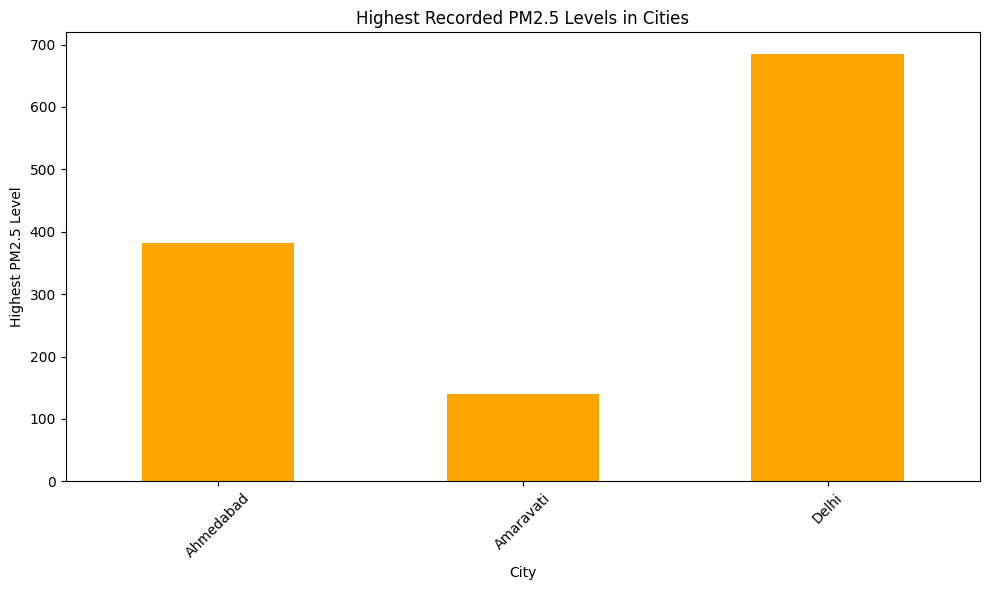

In [14]:
# Specify the cities and pollutant for which you want to plot the highest levels
cities_of_interest = ['Amaravati', 'Ahmedabad', 'Delhi']  # Replace with the cities you're interested in
pollutant_of_interest = 'PM2.5'  # Replace with the pollutant of interest

# Call the function to plot highest recorded levels for the specified cities and pollutant
plot_highest_levels(data, cities=cities_of_interest, pollutant=pollutant_of_interest)



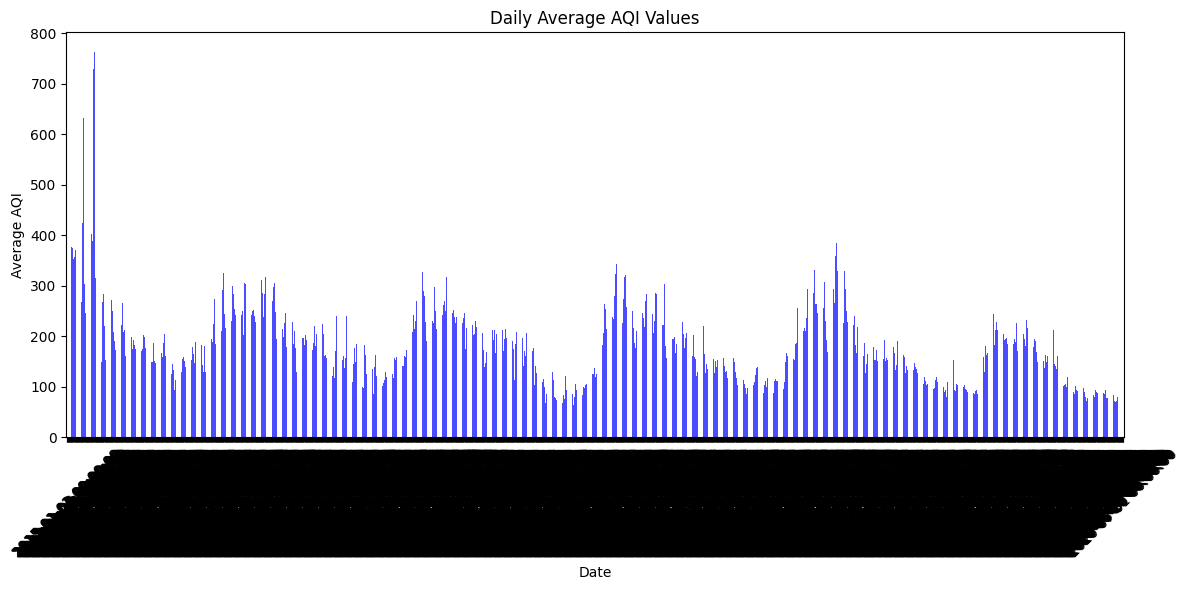

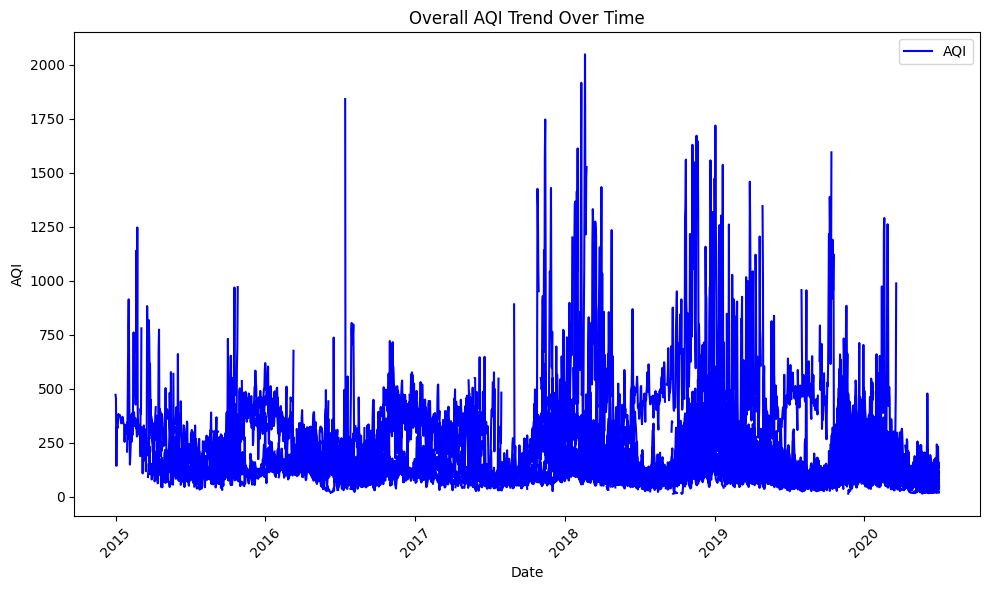

In [15]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by date and calculate mean AQI
daily_avg_aqi = data.groupby('Date')['AQI'].mean()

# Create a bar plot for daily average AQI values
plt.figure(figsize=(12, 6))
daily_avg_aqi.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.title("Daily Average AQI Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data[date_col], data[aqi_col], label="AQI", color="blue")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("Overall AQI Trend Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df.columns

NameError: name 'df' is not defined

# DMV 6 LAB

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# dataset source: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset
#df = pd.read_csv("/content/customer_shopping_data.csv")
df= pd.read_csv("customer_shopping_data 6.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [36]:
# To check the count of records grouped by region/branch of the mall
df.groupby("shopping_mall").count()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,,,,,
Cevahir AVM,4991,4991,4991,4991,4991,4991,4991,4991,4991
Emaar Square Mall,4811,4811,4811,4811,4811,4811,4811,4811,4811
Forum Istanbul,4947,4947,4947,4947,4947,4947,4947,4947,4947
Istinye Park,9781,9781,9781,9781,9781,9781,9781,9781,9781
Kanyon,19823,19823,19823,19823,19823,19823,19823,19823,19823
Mall of Istanbul,19943,19943,19943,19943,19943,19943,19943,19943,19943
Metrocity,15011,15011,15011,15011,15011,15011,15011,15011,15011
Metropol AVM,10161,10161,10161,10161,10161,10161,10161,10161,10161
Viaport Outlet,4914,4914,4914,4914,4914,4914,4914,4914,4914


In [37]:
# To check the count of records grouped by the product categories
df.groupby("category").count()

,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall
category,,,,,,,,,
Books,4981,4981,4981,4981,4981,4981,4981,4981,4981
Clothing,34487,34487,34487,34487,34487,34487,34487,34487,34487
Cosmetics,15097,15097,15097,15097,15097,15097,15097,15097,15097
Food & Beverage,14776,14776,14776,14776,14776,14776,14776,14776,14776
Shoes,10034,10034,10034,10034,10034,10034,10034,10034,10034
Souvenir,4999,4999,4999,4999,4999,4999,4999,4999,4999
Technology,4996,4996,4996,4996,4996,4996,4996,4996,4996
Toys,10087,10087,10087,10087,10087,10087,10087,10087,10087


In [39]:
# total sales for each mall branch
branch_sales = df.groupby("shopping_mall").sum()

In [40]:
# total sales for each category of product
category_sales = df.groupby("category").sum()

In [41]:
#to get the top performing branches
branch_sales.sort_values(by = "price", ascending = False)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,,,,,
Mall of Istanbul,I293112I196704I161949I267193I133061I157285I181...,C176086C289625C159164C317818C336576C123427C119...,FemaleFemaleFemaleFemaleMaleMaleMaleFemaleMale...,866333,ClothingCosmeticsToysCosmeticsClothingClothing...,60114,13851737.62,Credit CardCredit CardDebit CardCredit CardCre...,13/01/202120/04/20224/7/202212/1/20239/6/20226...
Kanyon,I138884I337046I326945I336189I252275I768348I147...,C241288C189076C283361C555402C313348C176727C245...,FemaleFemaleFemaleFemaleMaleFemaleMaleMaleFema...,862280,ClothingBooksClothingClothingTechnologyShoesCl...,59457,13710755.24,Credit CardCashCredit CardCredit CardCashCredi...,5/8/202224/10/202122/08/20213/6/202226/10/2021...
Metrocity,I127801I293455I306368I640508I294687I174250I109...,C266599C159642C240286C225330C300786C204553C232...,MaleMaleFemaleFemaleMaleFemaleMaleFemaleFemale...,652968,ClothingClothingFood & BeverageToysBooksBooksC...,44894,10249980.07,CashCredit CardCashDebit CardDebit CardCashDeb...,9/11/20214/11/202125/12/202231/07/202216/01/20...
Metropol AVM,I173702I993048I473411I138674I218590I195567I297...,C988172C218149C452806C155059C224743C992677C183...,FemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMa...,439086,ShoesClothingClothingCosmeticsCosmeticsClothin...,30530,6937992.99,Credit CardCashCashCredit CardDebit CardDebit ...,16/05/202126/07/202119/12/202214/02/20229/5/20...
Istinye Park,I121056I195396I209744I202367I664787I148377I204...,C151197C285161C251229C317478C237330C841663C173...,FemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFe...,424335,CosmeticsToysCosmeticsBooksCosmeticsClothingSo...,29465,6717077.54,CashDebit CardCredit CardCashCredit CardCashDe...,13/03/202216/05/202129/04/202124/02/202312/1/2...
Zorlu Center,I195744I167211I246550I117291I205366I269690I140...,C330667C164092C716788C134449C241642C126436C218...,FemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFe...,220926,Food & BeverageShoesFood & BeverageBooksClothi...,15234,3509649.02,Credit CardCredit CardCashCredit CardDebit Car...,5/1/202230/08/202210/9/20219/12/20227/11/20227...
Cevahir AVM,I179802I992454I412481I823067I655874I221715I870...,C312861C196845C125696C322947C447138C187266C169...,MaleMaleFemaleMaleFemaleFemaleMaleFemaleFemale...,215474,ClothingToysFood & BeverageClothingShoesFood &...,14949,3433671.84,CashCashCashCredit CardCashCashCredit CardDebi...,17/11/20227/3/20231/5/202118/06/202223/08/2022...
Viaport Outlet,I688768I137794I283443I200392I147334I307534I176...,C362288C133687C189493C307921C306395C434171C876...,MaleFemaleMaleFemaleMaleFemaleFemaleMaleFemale...,212771,ShoesFood & BeverageTechnologyClothingClothing...,14716,3414019.46,Credit CardDebit CardCredit CardCredit CardCas...,7/11/202112/3/202125/05/202214/09/202112/1/202...
Emaar Square Mall,I139207I183746I217053I331891I339732I246562I276...,C191708C220180C192344C501658C276887C227070C136...,FemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFema...,209575,BooksClothingShoesClothingFood & BeverageCosme...,14501,3390408.31,Credit CardCredit CardCashCredit CardCredit Ca...,28/10/202215/02/202310/10/202221/11/20214/1/20...


In [24]:
# to get the top selling categories
category_sales.sort_values(by = "price", ascending = False)

,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall
category,,,,,,,,,
Clothing,I138884I127801I227836I293112I293455I326945I179...,C241288C266599C657758C176086C159642C283361C312...,FemaleMaleFemaleFemaleMaleFemaleMaleFemaleFema...,1497054,103558,31075684.64,Credit CardCashCredit CardCredit CardCredit Ca...,5/8/20229/11/202124/05/202213/01/20214/11/2021...,KanyonMetrocityForum IstanbulMall of IstanbulM...
Shoes,I317333I173702I688768I217053I655874I768348I167...,C111565C988172C362288C192344C447138C176727C164...,MaleFemaleMaleMaleFemaleFemaleFemaleFemaleFema...,436027,30217,18135336.89,Debit CardCredit CardCredit CardCashCashCredit...,12/12/202116/05/20217/11/202110/10/202223/08/2...,Forum IstanbulMetropol AVMViaport OutletEmaar ...
Technology,I252275I160777I883721I289643I283443I164665I122...,C313348C626042C236859C584700C189493C255058C989...,MaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFe...,216669,15021,15772050.00,CashCashCredit CardCashCredit CardCashCredit C...,26/10/202122/02/202219/11/202122/08/202225/05/...,KanyonMetrocityMall of IstanbulKanyonViaport O...
Cosmetics,I121056I196704I209744I138674I752693I267193I269...,C151197C289625C251229C155059C306662C317818C126...,FemaleFemaleMaleMaleFemaleFemaleMaleFemaleFema...,657937,45465,1848606.90,CashCredit CardCredit CardCredit CardCashCredi...,13/03/202220/04/202229/04/202114/02/202228/04/...,Istinye ParkMall of IstanbulIstinye ParkMetrop...
Toys,I640508I992454I195396I161949I258195I181109I260...,C225330C196845C285161C159164C213742C119549C258...,FemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFema...,437032,30321,1086704.64,Debit CardCashDebit CardDebit CardCashCashCash...,31/07/20227/3/202316/05/20214/7/202226/11/2021...,MetrocityCevahir AVMIstinye ParkMall of Istanb...
Food & Beverage,I306368I195744I412481I339732I246550I137794I263...,C240286C330667C125696C276887C716788C133687C112...,FemaleFemaleFemaleMaleFemaleFemaleFemaleFemale...,640605,44277,231568.71,CashCredit CardCashCredit CardCashDebit CardCa...,25/12/20225/1/20221/5/20214/1/202310/9/202112/...,MetrocityZorlu CenterCevahir AVMEmaar Square M...
Books,I337046I139207I294687I174250I117291I304265I202...,C189076C191708C300786C204553C134449C653385C317...,FemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFe...,216882,14982,226977.30,CashCredit CardDebit CardCashCredit CardDebit ...,24/10/202128/10/202216/01/202116/12/20229/12/2...,KanyonEmaar Square MallMetrocityMetrocityZorlu...
Souvenir,I204979I870944I151332I317105I317140I141241I285...,C173084C169749C168491C177975C326893C143442C194...,FemaleMaleMaleFemaleFemaleMaleFemaleFemaleFema...,216922,14871,174436.83,Debit CardCredit CardCashDebit CardCashCredit ...,14/03/20218/6/202125/03/202129/07/202119/10/20...,Istinye ParkCevahir AVMKanyonKanyonIstinye Par...


In [25]:
# to get total sales for each combination of branch and product_category
combined_branch_category_sales = df.groupby(["shopping_mall", "category"]).sum()

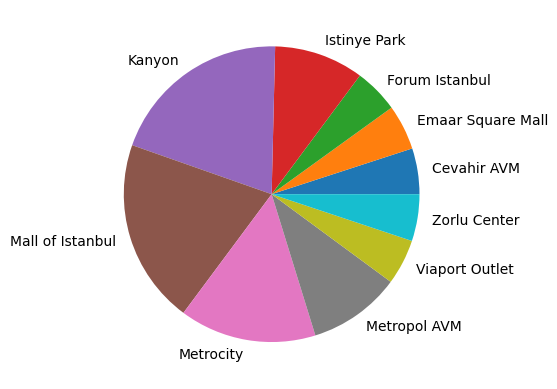

In [26]:
# pie chart for sales by branch
plt.pie(branch_sales["price"], labels = branch_sales.index)
plt.show()

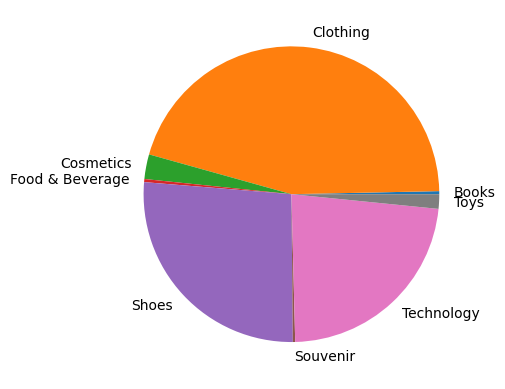

In [27]:
# pie chart for sales by product category
plt.pie(category_sales["price"], labels = category_sales.index)
plt.show()

In [28]:
combined_pivot = df.pivot_table(index="shopping_mall", columns="category", values="price", aggfunc="sum")

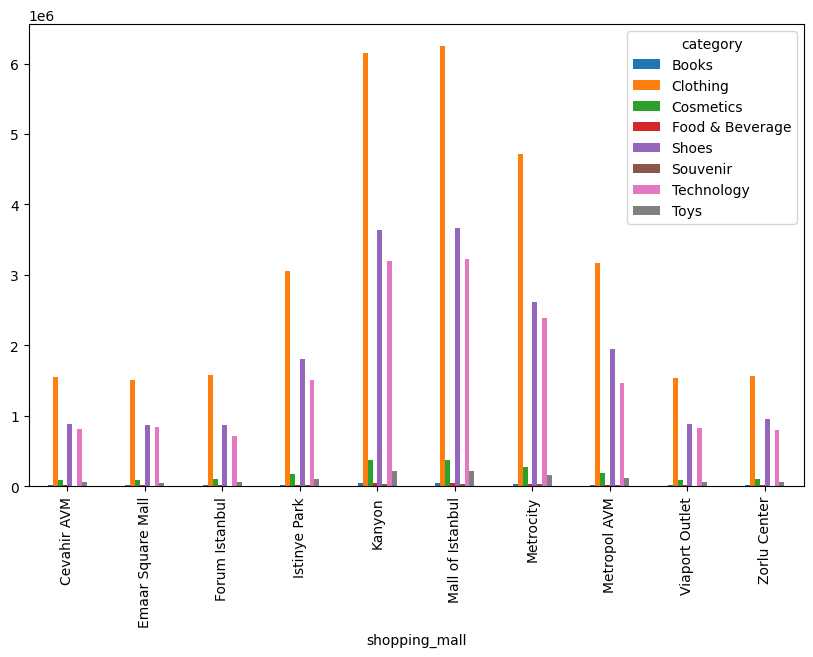

In [29]:
# grouped bar chart for sales of different categories at different branches
combined_pivot.plot(kind="bar", figsize=(10, 6))
plt.show()